In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from scipy.io import wavfile

def generate_wav_data():
    samplerate, data = wavfile.read('sample-input/crickets.wav')
    length = data.shape[0] / samplerate

    time = np.linspace(0., length, data.shape[0])
    # plt.plot(time, data[:, 0], label="Left channel")
    # plt.plot(time, data[:, 1], label="Right channel")
    # plt.legend()
    # plt.xlabel("Time [s]")
    # plt.ylabel("Amplitude")
    # plt.show()
    return time, data[:, 0]

def generate_sine_data(freq, sample_rate, duration, noise):
    """Generates a sample sine wave with a specific sample rate, constant
    frequency and max amplitude of 1.0.
    """
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies) + np.random.normal(scale=noise, size=len(x))
    return x, y


In [17]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds
NOISE = 0.04  # To be added to the sine data

def acquire_data():
    # return generate_sine_data(2, SAMPLE_RATE, DURATION, NOISE)
    return generate_wav_data()

/tmp/ipykernel_14064/710815937.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('sample-input/crickets.wav')


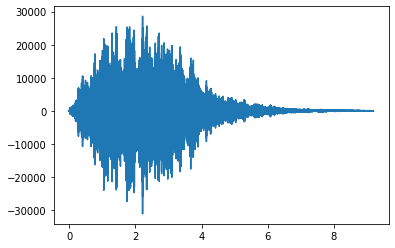

In [18]:
# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = acquire_data()
plt.plot(x, y)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (110251,) and (202782,)

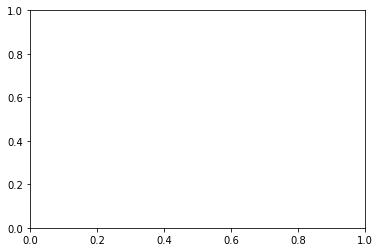

In [19]:

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(y)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()
